In [5]:
# import packages that we need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

from scipy import integrate

For a given flow, the velocity from time $t=0$ to $t=10\;s$ was $u=2\;m/s$, $v=0$. 

Then, from time $t=10\;s$ to $t=15\;s$, the velocity was $u=3\;m/s$, $v=-4\;m/s$.

A dye streak was started at a point in the flow field at time $t=0$, and the path of a particle in the fluid was also traced from that same point starting at the same time. 

Plot the streakline, pathline of the particle, and streamlines at time $t=15\;s$.

# Given Flow

In [6]:
t = np.array([0,10,15]) # [s]
u = np.array([2,3]) # [m/s]
v = np.array([0,-4]) # [m/s]
#####del_t = 1 #[s] # ADD IN FEATURE LATER

In [7]:
u_t = np.zeros(((t[-1]-t[0])+1,))
v_t = np.zeros(((t[-1]-t[0])+1,))

for i in range(0,t.shape[0]-1):
    for j in range(t[i],t[i+1]+1):
            u_t[j] = u[i]
            v_t[j] = v[i]

# <font color=blue>Streamline</font>

# <font color=green>Pathline</font>

In [8]:
# initial position = (0,0)
x_path = np.zeros(((t[-1]-t[0])+1,))
y_path = np.zeros(((t[-1]-t[0])+1,))

for i in range(0,t.shape[0]-1):
    for j in range(t[i]+1,t[i+1]+1):
            x_path[j] = x_path[j-1] + u[i]
            y_path[j] = y_path[j-1] + v[i]

## Pathline at time $t=15\;s$.

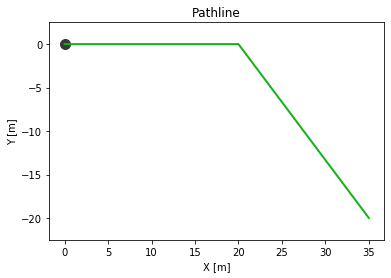

In [9]:
fig_pathline = plt.figure()
# initial position
plt.plot(x_path[0], y_path[0], color='xkcd:charcoal', marker='o', markersize=10)
# pathline
plt.plot(x_path, y_path, '-', color='xkcd:green', linewidth=2)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Pathline')
plt.axis('equal')
plt.show()

## Pathline Animation

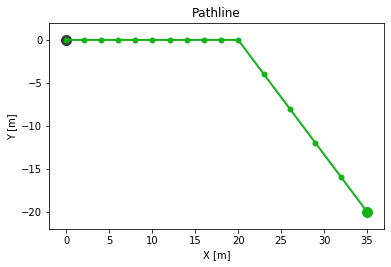

In [41]:
fig = plt.figure() 
# set axis
buffer = 2
ax = plt.axes(xlim=(np.amin(x_path)-buffer, np.amax(x_path)+buffer),
              ylim=(np.amin(y_path)-buffer, np.amax(y_path)+buffer),
              xlabel=('X [m]'), ylabel=('Y [m]'), title=('Pathline'),
              aspect=('equal')) 
# plot style
# initial position
plt.plot(x_path[0], y_path[0], color='xkcd:charcoal', marker='o', markersize=10)
# past position
line_past, = ax.plot([], [], color='xkcd:green', marker='o', linewidth=2, markersize=5) 
# current position
current_point, = ax.plot([], [], color='xkcd:green', marker='o', markersize=10)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_past.set_data([], []) 
    current_point.set_data([], []) 
    return line_past, current_point 

# animation function 
def animate(i): 
    # x, y values to be plotted 
    line_past.set_data(x_path[:i+1], y_path[:i+1]) 
    current_point.set_data(x_path[i],y_path[i])
    return line_past, current_point  


# call the animator
# interval = Delay between frames in milliseconds
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=x_path.size, interval=200, blit=True) 
HTML(anim.to_jshtml())

## With Quiver

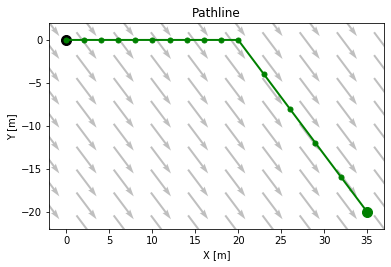

In [91]:
fig = plt.figure() 
# set axis
buffer = 2
ax = plt.axes(xlim=(np.amin(x_path)-buffer, np.amax(x_path)+buffer),
              ylim=(np.amin(y_path)-buffer, np.amax(y_path)+buffer),
              xlabel=('X [m]'), ylabel=('Y [m]'), title=('Pathline'),
              aspect=('equal')) 
# create velocity field grid
steps = 10
x_vals = np.linspace(np.amin(x_path)-buffer,np.amax(x_path)+buffer,steps)
y_vals = np.linspace(np.amin(y_path)-buffer,np.amax(y_path)+buffer,steps)
X,Y= np.meshgrid(x_vals, y_vals, sparse=False, indexing='xy')

# plot style
# initial position
plt.plot(x_path[0], y_path[0], color='black', marker='o', markersize=10)
# past position
line_past, = ax.plot([], [], color='green', marker='o', linewidth=2, markersize=5) 
# current position
current_point, = ax.plot([], [], color='green', marker='o', markersize=10)
# velocity field
vel_field = ax.quiver(X, Y, np.empty(X.size), np.empty(X.size), color='.75', scale=50, pivot='mid')

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line_past.set_data([], []) 
    current_point.set_data([], [])
    vel_field.set_UVC(np.empty(X.size), np.empty(X.size))
    return line_past, current_point, vel_field

# animation function 
def animate(i): 
    # x, y values to be plotted 
    line_past.set_data(x_path[:i+1], y_path[:i+1]) 
    current_point.set_data(x_path[i],y_path[i])
    U = np.multiply(u_t[i],np.ones(X.size))
    V = np.multiply(v_t[i],np.ones(X.size))
    vel_field.set_UVC(U,V)
    return line_past, current_point, vel_field

# call the animator
# interval = Delay between frames in milliseconds
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=x_path.size, interval=200, blit=True) 
HTML(anim.to_jshtml())

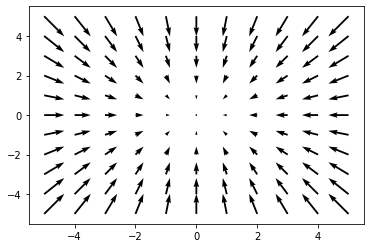

In [40]:
Q_sink = 10;

#  Create Grid
minval = -5
maxval = 5
steps = 11
xy_axis = np.linspace(minval,maxval,steps)
X,Y= np.meshgrid(xy_axis, xy_axis, sparse=False, indexing='xy')

# Create Velocity Field
U = -Q_sink/(4)*(2*X)
V = -Q_sink/(4)*(2*Y)

# Plot
plt.quiver(X,Y,U,V)

In [1]:
u_t

NameError: name 'u_t' is not defined

# <font color=red>Streakline</font>